### Assignment 9 

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [105]:
data = pd.read_csv('iris.csv')
y = data.iloc[:,[5]].values
data.drop(columns=['Id', 'Species','PetalLengthCm','PetalWidthCm'], axis=1, inplace=True)
data = pd.DataFrame(data)
data = data.to_numpy()

In [106]:
def fit_y_data(y):
    a_y = []
    for i in y:
        if(i == 'comp0'):
            a_y.append(1)
        if(i == 'comp1'):
            a_y.append(2)
        if(i == 'comp2'):
            a_y.append(3)
    y = np.array(a_y)
    return y

In [107]:
def fit_y_data2(y):
    a_y = []
    for i in y:
        if(i == 'Iris-setosa'):
            a_y.append(1)
        if(i == 'Iris-versicolor'):
            a_y.append(2)
        if(i == 'Iris-virginica'):
            a_y.append(3)
    y = np.array(a_y)
    return y

In [108]:
class GaussianMixtureModel:
    def __init__(self, n_components, max_iter = 100, comp_names=None):
        
        self.n_componets = n_components
        self.max_iter = max_iter
        if comp_names == None:
            self.comp_names = [f"comp{index}" for index in range(self.n_componets)]
        else:
            self.comp_names = comp_names
        self.pi = [1/self.n_componets for comp in range(self.n_componets)]

    def multivariate_normal(self, X, mean_vector, covariance_matrix):
        return (2*np.pi)**(-len(X)/2)*np.linalg.det(covariance_matrix)**(-1/2)*np.exp(-np.dot(np.dot((X-mean_vector).T, np.linalg.inv(covariance_matrix)), (X-mean_vector))/2)

    def fit(self, X):
        new_X = np.array_split(X, self.n_componets)
        self.mean_vector = [np.mean(x, axis=0) for x in new_X]
        self.covariance_matrixes = [np.cov(x.T) for x in new_X]
        del new_X
        for iteration in range(self.max_iter):
            
            self.r = np.zeros((len(X), self.n_componets))
            for n in range(len(X)):
                for k in range(self.n_componets):
                    self.r[n][k] = self.pi[k] * self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrixes[k])
                    self.r[n][k] /= sum([self.pi[j]*self.multivariate_normal(X[n], self.mean_vector[j], self.covariance_matrixes[j]) for j in range(self.n_componets)])
            N = np.sum(self.r, axis=0)
            self.mean_vector = np.zeros((self.n_componets, len(X[0])))
            for k in range(self.n_componets):
                for n in range(len(X)):
                    self.mean_vector[k] += self.r[n][k] * X[n]
            self.mean_vector = [1/N[k]*self.mean_vector[k] for k in range(self.n_componets)]
            self.covariance_matrixes = [np.zeros((len(X[0]), len(X[0]))) for k in range(self.n_componets)]
            for k in range(self.n_componets):
                self.covariance_matrixes[k] = np.cov(X.T, aweights=(self.r[:, k]), ddof=0)
            self.covariance_matrixes = [1/N[k]*self.covariance_matrixes[k] for k in range(self.n_componets)]
            self.pi = [N[k]/len(X) for k in range(self.n_componets)]
    def predict(self, X):
        
        probas = []
        for n in range(len(X)):
            probas.append([self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrixes[k])
                           for k in range(self.n_componets)])
        cluster = []
        for proba in probas:
            cluster.append(self.comp_names[proba.index(max(proba))])
        return cluster

In [109]:
model = GaussianMixtureModel(n_components = 3)
model.fit(data)
labels = model.predict(data)
y = fit_y_data2(y)
cluster = fit_y_data(labels)
print("accurancy = " ,np.mean(y == cluster))

accurancy =  0.8066666666666666


#### Question 2

In [110]:
data = pd.read_csv('iris.csv')
y = data.iloc[:,[5]].values
data.drop(columns=['Id', 'Species','PetalLengthCm','PetalWidthCm'], axis=1, inplace=True)
data = pd.DataFrame(data)
data = data.to_numpy()

In [111]:
def func(cluster):
    data2 = pd.read_csv('iris.csv')
    data2['cluster'] = cluster
    data2.drop(columns=['Id', 'Species'], axis=1, inplace=True)
    return data2

In [112]:
def distance_cal(s,p):
    a = np.delete(s, len(s)-1)
    b = np.delete(p, len(p)-1)
    return np.linalg.norm(a - b)

In [113]:
def calcu_sil_score(data):
    sil = []
    for i in range(len(data)):
        s = data[i] 
        a = []
        b = []
        for p in data:
            if(p[4] == s[4]):
                a.append(distance_cal(s,p))
            else:
                b.append(distance_cal(s,p))

        a_n = np.asarray(a)
        b_n = np.asarray(b)
        a_i = np.average(a_n)
        b_i = np.average(b_n)
        s_i = (b_i - a_i)/max(b_i,a_i)
        sil.append(s_i)
    sil_n = np.asarray(sil)
    sil_score = np.mean(sil_n)
    return sil_score

In [118]:
cost_list = []
for k in range(1,5):
    cluster = KMeans(n_clusters=k, random_state=42)
    cluster_l = cluster.fit_predict(data)
    d = func(cluster_l)
    sil_score = calcu_sil_score(d.to_numpy())
    cost_list.append(sil_score)

e:\IIIT-G\0CS360 - Machine Learning Lab\mlpython\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
e:\IIIT-G\0CS360 - Machine Learning Lab\mlpython\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


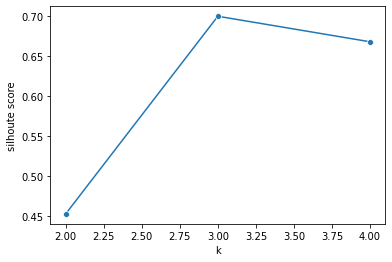

In [119]:
sns.lineplot(x=range(1,5), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('silhoute score')
plt.show()

### for k-mean we take 3 as a k value since Silhouette Coefficient is highest for k = 3